In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split
from logisticreg import LogisticRgressionGD
from helpers.utils import plot_decision_regions
import matplotlib.pyplot as plt 

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [2]:
from json import load

iris = load_iris()
X, y = iris['data'][:, [2, 3]], iris['target']

In [3]:
print('Class labels', np.unique(y))

Class labels [0 1 2]


In [4]:
X_train, X_test,y_train,y_test = train_test_split(X, y, 
                                    test_size=0.3, random_state=1, stratify=y)

In [5]:
print('Labels in counts of y', np.bincount(y))

print('Labels count in y_train', np.bincount(y_train))

print('Labels count in y_test', np.bincount(y_test))

Labels in counts of y [50 50 50]
Labels count in y_train [35 35 35]
Labels count in y_test [15 15 15]


In [6]:
# scale inputs
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",1


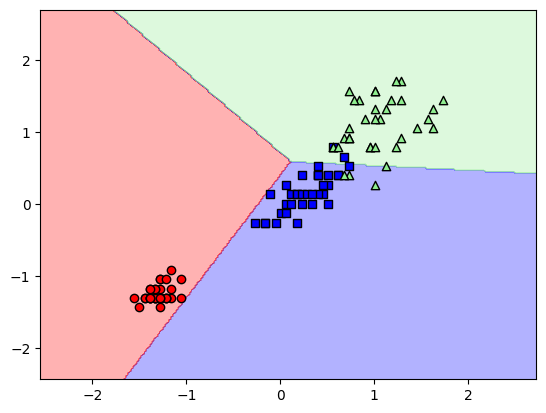

In [8]:

plot_decision_regions(X_train_std, y_train, classifier=ppn)

In [9]:
y_pred = ppn.predict(X_test_std)

print(f'Misclassified examples   {(y_test != y_pred).sum()}')


Misclassified examples   1


In [10]:

from sklearn.metrics import accuracy_score
print(f': {accuracy_score(y_test, y_pred):.3f}')

: 0.978


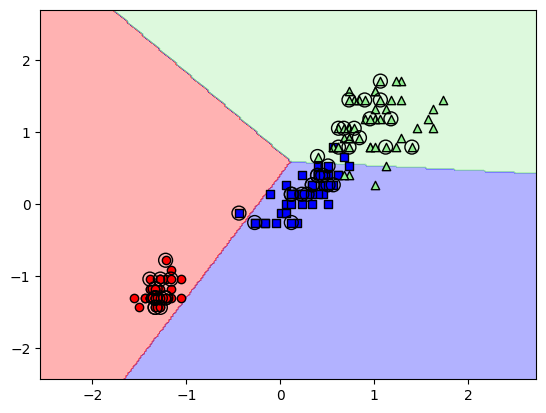

In [11]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                    test_idx=range(105, 150) # there are 45 test samples
                    )

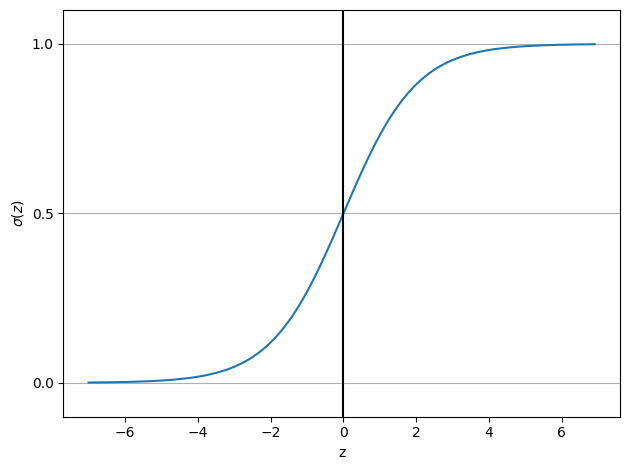

In [12]:
from scipy.integrate import simpson
from helpers.utils import sigmoid

z = np.arange(-7, 7, 0.1)

sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.ylabel(r'$\sigma (z)$')
plt.xlabel('z')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


$$
L(\sigma(z), y, w, b) = -ylog(\sigma(z)) - (1 - y)log(1 - \sigma(z))
$$

$$
L(\sigma(z); y; w, b) =
\begin{cases}
-\log(\sigma(z)) & \text{if } y = 1 \\
-\log(1 - \sigma(z)) & \text{if } y = 0
\end{cases}
$$

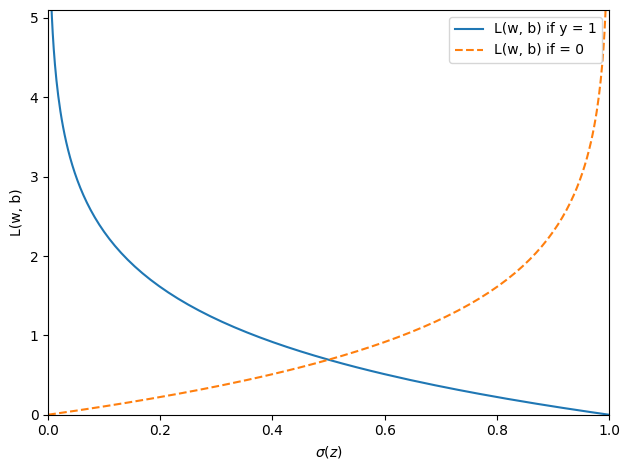

In [13]:
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)

sigma_z = sigmoid(z)

c1 = loss_1(z)
c0 = loss_0(z)

plt.plot(sigma_z, c1, label='L(w, b) if y = 1')
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel(r'$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


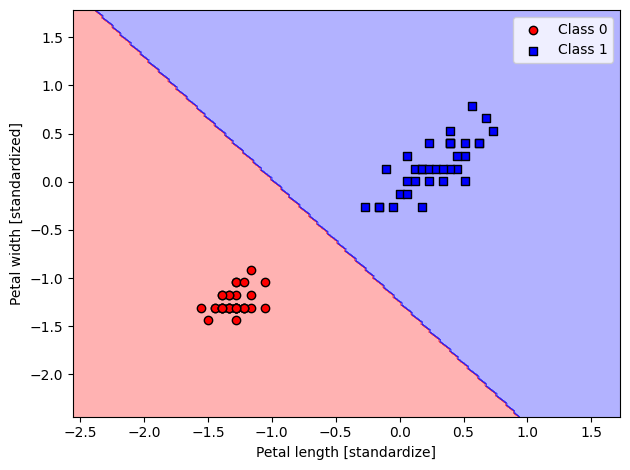

In [14]:
X_train01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_tain_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRgressionGD(eta=0.3, n_iter=1000,
random_state=1)

lrgd.fit(X_train01_subset, y_tain_01_subset)
plot_decision_regions(X=X_train01_subset, y=y_tain_01_subset,
                classifier=lrgd
                )
plt.xlabel('Petal length [standardize]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


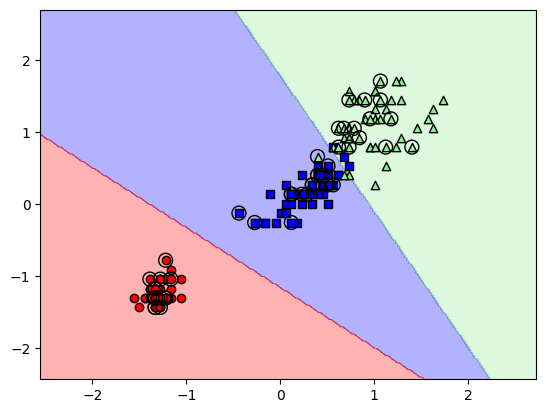

In [15]:
# Usinbg sklearn's implementation of logistic regression
lr = LogisticRegression(C=100.0, solver='lbfgs')

lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                    y_combined, classifier=lr, test_idx=range(105, 150))

In [16]:
lr.predict(X_test_std)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

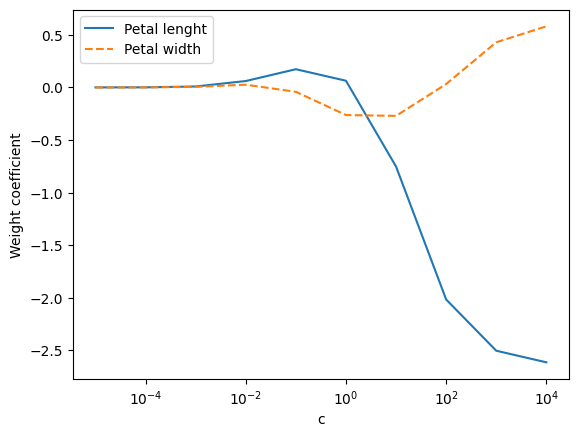

In [17]:
# regularization

weights, params = [], []

for c in np.arange(-5, 5):

    lr = LogisticRegression(C=10.**c)

    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='Petal lenght')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('c')
plt.legend(loc='best')
plt.xscale('log')
plt.show()



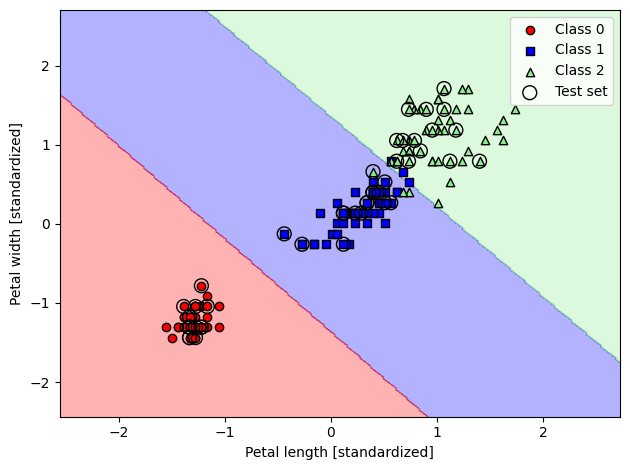

In [18]:
from matplotlib.pyplot import plot
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm,
    test_idx=range(105, 150)
)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

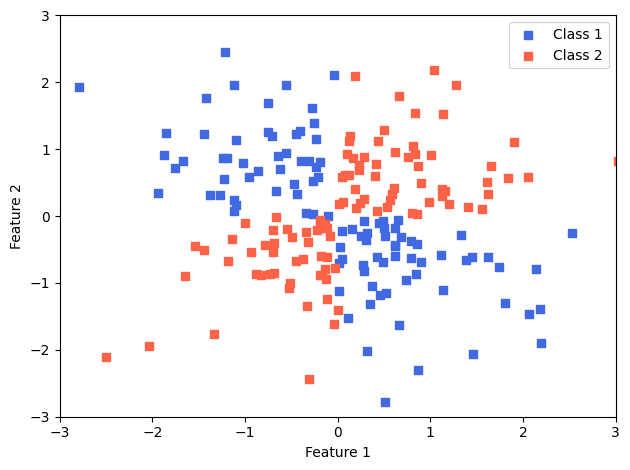

In [19]:
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                        X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor ==1, 0],
            X_xor[y_xor == 1, 1], 
            color='royalblue', marker='s', label='Class 1')

plt.scatter(X_xor[y_xor ==0, 0],
            X_xor[y_xor == 0, 1], 
            color='tomato', marker='s', label='Class 2')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



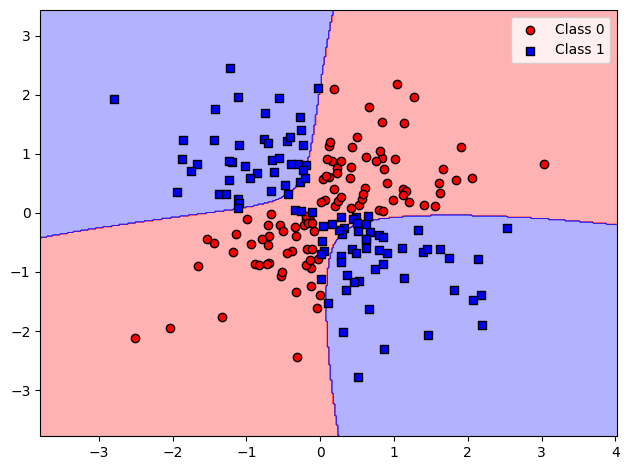

In [20]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

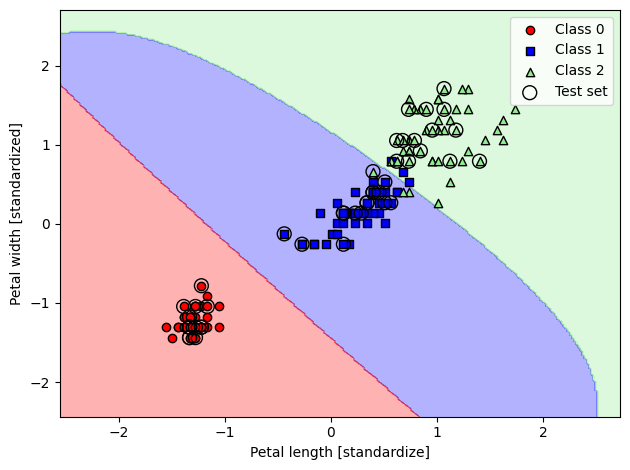

In [21]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm,
    test_idx=range(105, 150)
)
plt.xlabel('Petal length [standardize]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

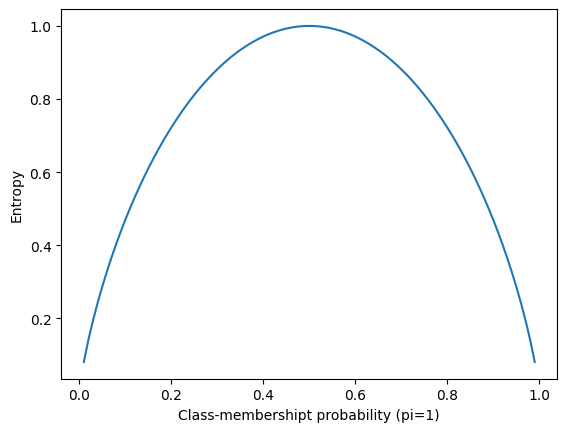

In [22]:
from helpers.utils import gini, error, entropy
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.xlabel('Class-membershipt probability (pi=1)')
plt.ylabel('Entropy')
plt.show()

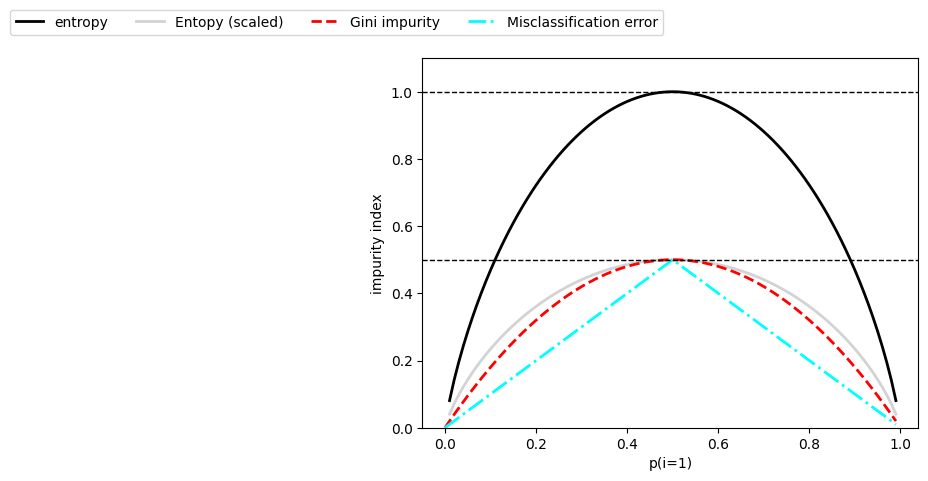

In [26]:

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                                                                      ['entropy', 'Entopy (scaled)',
                                                                      'Gini impurity', 'Misclassification error'],
                                                                      ['-', '-', '--', '-.'],
                                                                      ['black', 'lightgray', 'red', 'cyan']   ):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='best', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

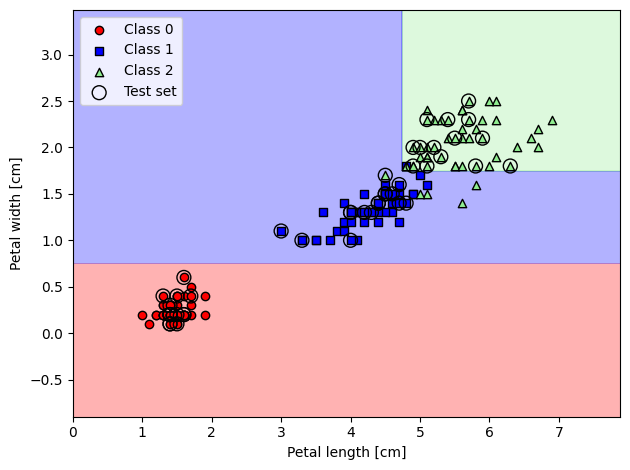

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150)
)

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

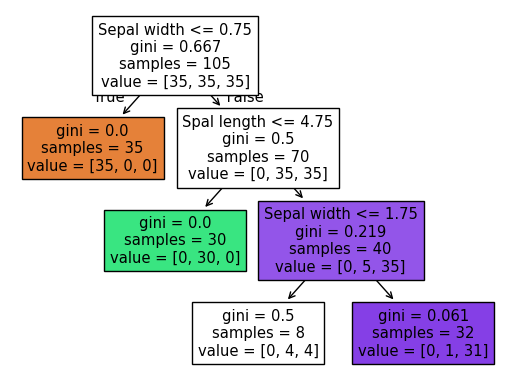

In [31]:
from sklearn import tree 

feature_names = ['Spal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

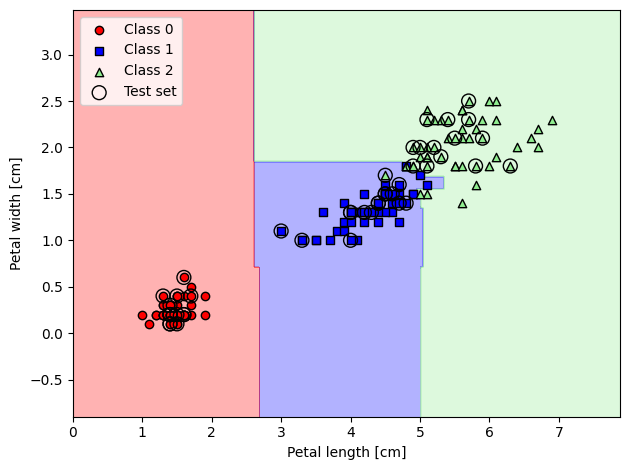

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)
plot_decision_regions(
    X_combined, y_combined, classifier=forest, test_idx=range(105, 150)
)

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

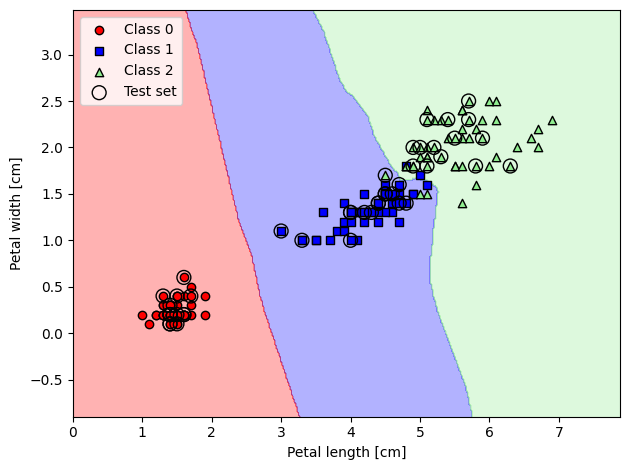

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train, y_train)

plot_decision_regions(
    X_combined, y_combined, classifier=knn, test_idx=range(105, 150)
)

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()